# Python and Pandas: UFood Marketing Data Analysis Project

### Key Objectives:
- Explore the data – don’t just plot means and counts. Provide insights, define cause and effect.
- Provide a better understanding of the characteristic features of respondents; Propose and describe a customer segmentation based on customers behaviors.
- Visualize data and provide written reasoning behind discoveries.

In [1]:
# import necessary libraries
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read in the data file 'imdb_movies.csv'
ufood_data = pd.read_csv(
    r'C:\Users\alex_\Desktop\Data Analysis Projects\Python\Projects\Python-Food-Marketing-Analysis\Resources\u_food_marketing.csv')

# display the first rows of the data for exploration
pd.set_option('display.max.columns', 50)
ufood_data.head(50)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0
5,62513.0,0,1,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,53,2452,0,0,0,1,0,0,0,0,1,0,702,688,0
6,55635.0,0,1,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0,49,2752,1,0,0,0,0,0,0,1,0,0,563,536,0
7,33454.0,1,0,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0,35,2576,0,1,0,0,0,0,0,0,0,1,146,123,0
8,30351.0,1,0,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,46,2547,0,0,0,1,0,0,0,0,0,1,44,42,0
9,5648.0,1,1,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0,70,2267,0,0,0,1,0,0,0,0,0,1,36,23,1


### Data Exploration and Cleaning

In [3]:
# explore column data types
# no null values detected
ufood_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [4]:
# check for duplicates
ufood_data[ufood_data.duplicated()].count()

Income                  184
Kidhome                 184
Teenhome                184
Recency                 184
MntWines                184
MntFruits               184
MntMeatProducts         184
MntFishProducts         184
MntSweetProducts        184
MntGoldProds            184
NumDealsPurchases       184
NumWebPurchases         184
NumCatalogPurchases     184
NumStorePurchases       184
NumWebVisitsMonth       184
AcceptedCmp3            184
AcceptedCmp4            184
AcceptedCmp5            184
AcceptedCmp1            184
AcceptedCmp2            184
Complain                184
Z_CostContact           184
Z_Revenue               184
Response                184
Age                     184
Customer_Days           184
marital_Divorced        184
marital_Married         184
marital_Single          184
marital_Together        184
marital_Widow           184
education_2n Cycle      184
education_Basic         184
education_Graduation    184
education_Master        184
education_PhD       

In [5]:
# many duplicate rows found, remove them
ufood_data.drop_duplicates(inplace = True)

In [6]:
# combine the 'Kidhome' and 'Teenhome' columns into one called 'Total_Children'
ufood_data['Total_Children'] = ufood_data[['Kidhome', 'Teenhome']].sum(axis = 1)

In [7]:
# change marital status columns to now have values from 1-5 instead of 0 or 1
ufood_data['marital_Divorced'] = ufood_data['marital_Divorced'].replace({1:5, 0:0})
ufood_data['marital_Married'] = ufood_data['marital_Married'].replace({1:4, 0:0})
ufood_data['marital_Single'] = ufood_data['marital_Single'].replace({1:3, 0:0})
ufood_data['marital_Together'] = ufood_data['marital_Together'].replace({1:2, 0:0})
ufood_data['marital_Widow'] = ufood_data['marital_Widow'].replace({1:1, 0:0})

# combine the columns into one 'Marital_Status' column
ufood_data['Marital_Status'] = ufood_data[['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']].sum(axis = 1)

# create the column as a string column
ufood_data['Marital_Status_Str'] = ufood_data['Marital_Status'].map({5 : 'Divorced', 4 : 'Married', 3 : 'Single', 2 : 'Together', 1 : 'Widow'})

In [8]:
# change education status columns to now have values from 1-5 instead of 0 or 1
ufood_data['education_2n Cycle'] = ufood_data['education_2n Cycle'].replace({1:1, 0:0})
ufood_data['education_Basic'] = ufood_data['education_Basic'].replace({1:2, 0:0})
ufood_data['education_Graduation'] = ufood_data['education_Graduation'].replace({1:3, 0:0})
ufood_data['education_Master'] = ufood_data['education_Master'].replace({1:4, 0:0})
ufood_data['education_PhD'] = ufood_data['education_PhD'].replace({1:5, 0:0})

# combine the columns into one 'Education_Status' column
ufood_data['Education_Status'] = ufood_data[['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']].sum(axis = 1)

# create the column as a string column
ufood_data['Education_Status_Str'] = ufood_data['Education_Status'].map({1 : '2n Cycle', 2 : 'Basic', 3 : 'Graduation', 4 : 'Masters', 5 : 'PhD'})

In [9]:
# create a column to show if any marketing campaigns were accepted by a customer or not 
# a 1 means at least one campaign was accepted, 0 means none were accepted
ufood_data['Accepted_Campaigns'] = ufood_data[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp2', 'AcceptedCmp1', 'Response']].sum(axis = 1)
ufood_data['Accepted_Campaigns'] = (ufood_data['Accepted_Campaigns'] != 0).astype(int)

In [10]:
# view dataframe to confirm changes
ufood_data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_Str,Education_Status,Education_Status_Str,Accepted_Campaigns
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3,Graduation,1
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,Single,3,Graduation,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,Together,3,Graduation,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,Together,3,Graduation,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,5,407,392,0,1,4,Married,5,PhD,0


In [11]:
# view columns with a high correlation to 'Accepted_Campaigns'
all_corr = ufood_data.corr(method = 'pearson', numeric_only = True)['Accepted_Campaigns'].sort_values(ascending = False)
all_corr = all_corr[(all_corr > 0.3) & (all_corr < 1)]
all_corr

AcceptedCmpOverall     0.714792
Response               0.686288
AcceptedCmp4           0.463804
AcceptedCmp3           0.457291
AcceptedCmp5           0.449056
AcceptedCmp1           0.427119
MntWines               0.418647
MntTotal               0.396330
MntRegularProds        0.394459
NumCatalogPurchases    0.324215
MntMeatProducts        0.302546
Name: Accepted_Campaigns, dtype: float64

In [12]:
# define age groups
age_groups = [(20, 29), (30, 39), (40, 49), (50, 59), (60, 69), (70, 85)]

In [13]:
# use a function to put each customer into their respective age group
def assign_age_group(Age):
    for age_range in age_groups:
        if age_range[0] <= Age <= age_range[1]:
            return f"{age_range[0]} - {age_range[1]}"
    return("Unknown")

# create new column 'age_group' using the function 'assign_age_group'
ufood_data['Age_Group'] = ufood_data['Age'].apply(assign_age_group)
ufood_data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_Str,Education_Status,Education_Status_Str,Accepted_Campaigns,Age_Group
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3,Graduation,1,60 - 69
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,Single,3,Graduation,0,60 - 69
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,Together,3,Graduation,0,50 - 59
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,Together,3,Graduation,0,30 - 39
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,5,407,392,0,1,4,Married,5,PhD,0,30 - 39


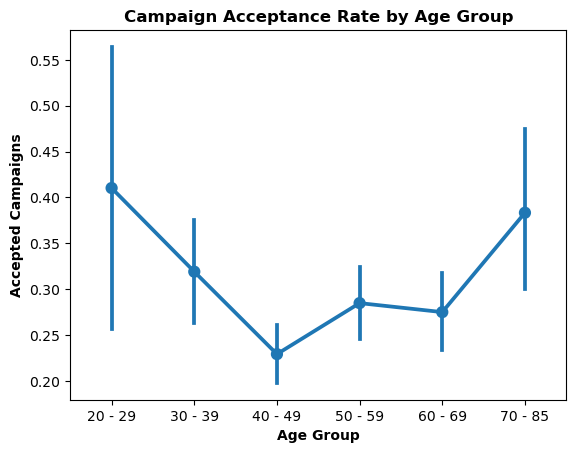

In [14]:
# create plot to visualize accepted campaign rate and confidence intervals for each age group
age_order = ['20 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70 - 85']
sns.pointplot(data = ufood_data, x = 'Age_Group', y = 'Accepted_Campaigns', order = age_order)
plt.title('Campaign Acceptance Rate by Age Group', fontweight='bold')
plt.xlabel('Age Group', fontweight='bold')
plt.ylabel('Accepted Campaigns', fontweight='bold')
plt.savefig(r'C:\Users\alex_\Desktop\Data Analysis Projects\Python\Projects\Python-Food-Marketing-Analysis\Images\plot1.png')
plt.show()

In [15]:
# Age Segmentation - core audience for accepting campaigns is 20-29, and 70-85 years old

In [16]:
# check counts for each age group
counts = ufood_data['Age_Group'].value_counts()
counts

40 - 49    637
50 - 59    481
60 - 69    440
30 - 39    304
70 - 85    120
20 - 29     39
Name: Age_Group, dtype: int64

In [17]:
# check each age group by percentage of overall dataset, make into a dataframe
percentage = counts/ufood_data.shape[0]
age_percentage = percentage.reset_index()
age_percentage.columns = ['age_group', 'percentage']
age_percentage = age_percentage.sort_values('age_group')
age_percentage

,age_group,percentage
5,20 - 29,0.019297
3,30 - 39,0.150421
0,40 - 49,0.315190
1,50 - 59,0.238001
2,60 - 69,0.217714
4,70 - 85,0.059377


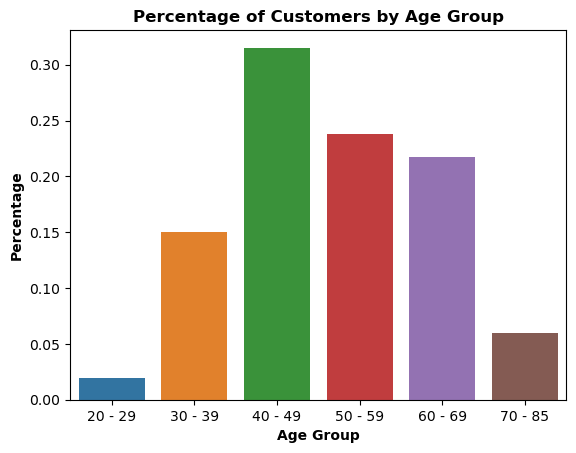

In [18]:
# visualize the age group percentages with a bar chart
sns.barplot(data = age_percentage, x = 'age_group', y = 'percentage')
plt.title('Percentage of Customers by Age Group', fontweight='bold')
plt.xlabel('Age Group', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.savefig(r'C:\Users\alex_\Desktop\Data Analysis Projects\Python\Projects\Python-Food-Marketing-Analysis\Images\plot2.png')
plt.show()

In [19]:
# Age Segmentation - core audience for total spending amount is 30-70 years old

In [20]:
# create new dataframe to show the total amount spent by each age group
grouped_food = ufood_data.groupby('Age_Group')['MntTotal'].sum().reset_index()
grouped_food

,Age_Group,MntTotal
0,20 - 29,34261
1,30 - 39,145181
2,40 - 49,296051
3,50 - 59,287630
4,60 - 69,280718
5,70 - 85,95577


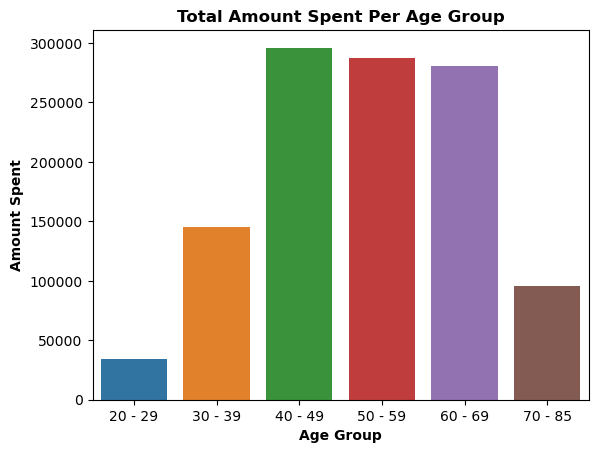

In [21]:
# visualize the age group spending amounts with a bar chart
sns.barplot(data = grouped_food, x = 'Age_Group', y = 'MntTotal')
plt.title('Total Amount Spent Per Age Group', fontweight='bold')
plt.xlabel('Age Group', fontweight='bold')
plt.ylabel('Amount Spent', fontweight='bold')
plt.savefig(r'C:\Users\alex_\Desktop\Data Analysis Projects\Python\Projects\Python-Food-Marketing-Analysis\Images\plot3.png')
plt.show()

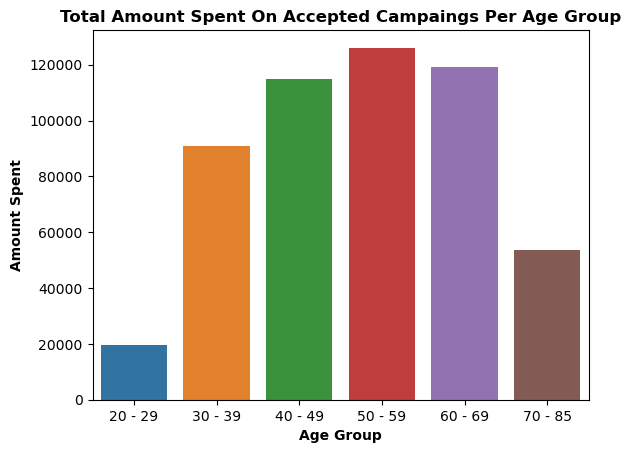

In [22]:
# create new dataframe to show the total amount spent by each age group when accepting a marketing campaign
acct_campaign = ufood_data[ufood_data['Accepted_Campaigns'] != 0]
grouped_food_acct = acct_campaign.groupby('Age_Group')['MntTotal'].sum().reset_index()

# visualize the age group spending amounts for accepted campaigns with a bar chart
sns.barplot(data = grouped_food_acct, x = 'Age_Group', y = 'MntTotal')
plt.title('Total Amount Spent On Accepted Campaings Per Age Group', fontweight='bold')
plt.xlabel('Age Group', fontweight='bold')
plt.ylabel('Amount Spent', fontweight='bold')
plt.savefig(r'C:\Users\alex_\Desktop\Data Analysis Projects\Python\Projects\Python-Food-Marketing-Analysis\Images\plot4.png')
plt.show()

In [23]:
# create a dataframe and obtain the sum of purchases made by type of purchase
sum_food = pd.DataFrame(ufood_data[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(), columns = ['Sum'])
sum_food = sum_food.reset_index()
sum_food.rename(columns = {'index':'Type_of_Purchase'}, inplace = True)
sum_food

,Type_of_Purchase,Sum
0,NumWebPurchases,8317
1,NumCatalogPurchases,5345
2,NumStorePurchases,11737


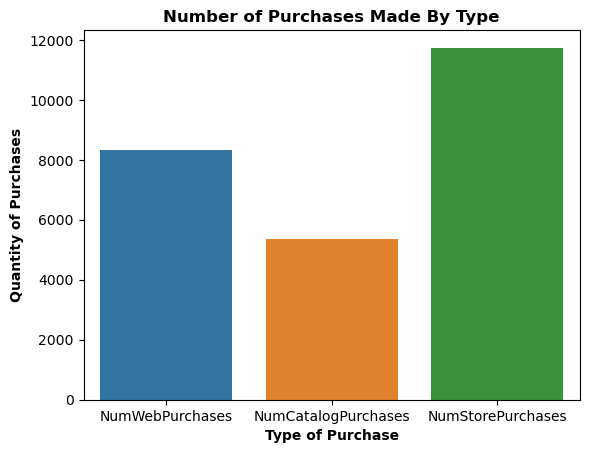

In [24]:
# visualize the athe sum of purchases made by type of purchase with a bar chart
sns.barplot(data = sum_food, x = 'Type_of_Purchase', y = 'Sum')
plt.title('Number of Purchases Made By Type', fontweight='bold')
plt.xlabel('Type of Purchase', fontweight='bold')
plt.ylabel('Quantity of Purchases', fontweight='bold')
plt.savefig(r'C:\Users\alex_\Desktop\Data Analysis Projects\Python\Projects\Python-Food-Marketing-Analysis\Images\plot5.png')
plt.show()

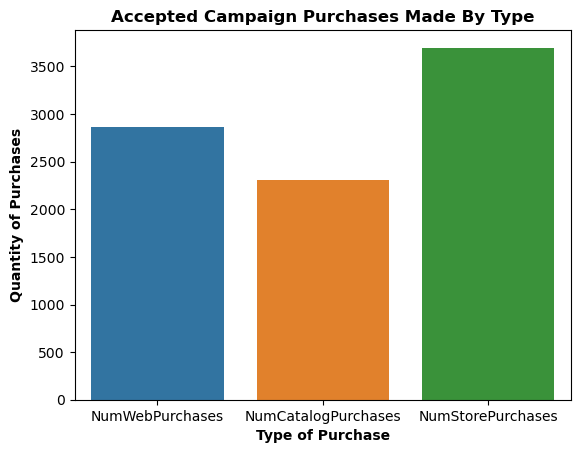

In [25]:
# do the same as above but specifically for customers who accepted marketing campaigns
acct_campaign = ufood_data[ufood_data['Accepted_Campaigns'] != 0]
sum_food = pd.DataFrame(acct_campaign[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(), columns = ['Sum'])
sum_food = sum_food.reset_index()
sum_food.rename(columns = {'index':'Type_of_Purchase'}, inplace = True)
sns.barplot(data = sum_food, x = 'Type_of_Purchase', y = 'Sum')
plt.title('Accepted Campaign Purchases Made By Type', fontweight='bold')
plt.xlabel('Type of Purchase', fontweight='bold')
plt.ylabel('Quantity of Purchases', fontweight='bold')
plt.savefig(r'C:\Users\alex_\Desktop\Data Analysis Projects\Python\Projects\Python-Food-Marketing-Analysis\Images\plot6.png')
plt.show()

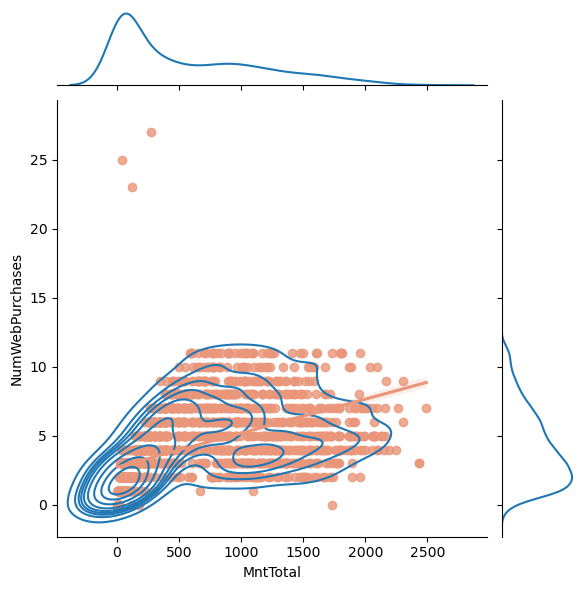

In [26]:
x = sns.jointplot(data = ufood_data, x = 'MntTotal', y = 'NumWebPurchases', kind = 'kde')
x.plot_joint(sns.regplot, color = 'darksalmon')

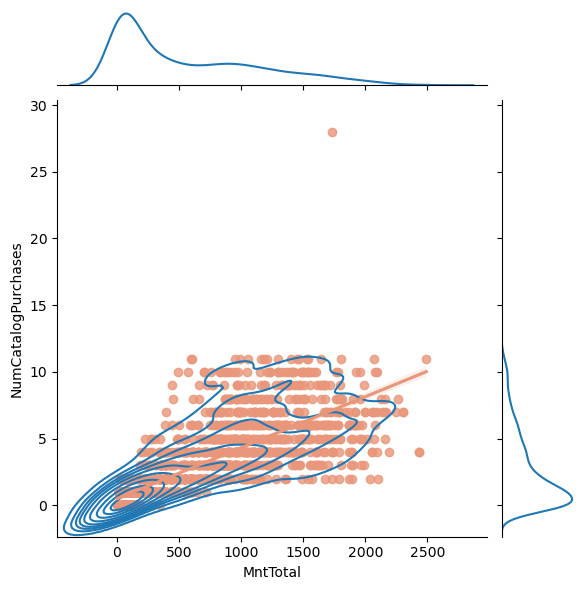

In [27]:
x = sns.jointplot(data = ufood_data, x = 'MntTotal', y = 'NumCatalogPurchases', kind = 'kde')
x.plot_joint(sns.regplot, color = 'darksalmon')

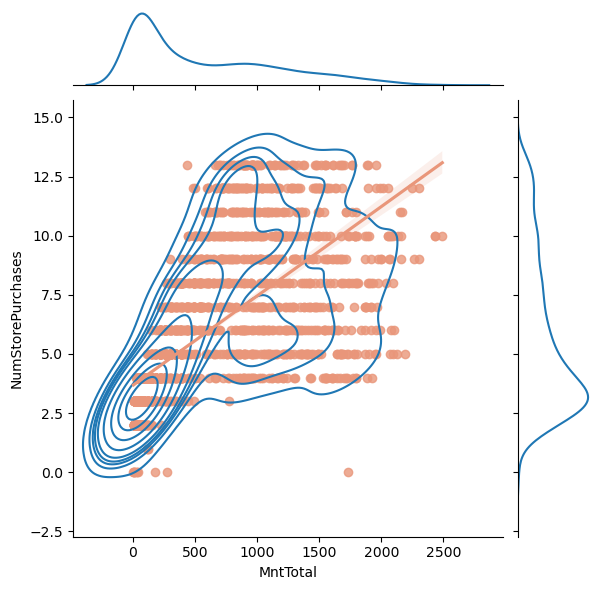

In [28]:
x = sns.jointplot(data = ufood_data, x = 'MntTotal', y = 'NumStorePurchases', kind = 'kde')
x.plot_joint(sns.regplot, color = 'darksalmon')

In [29]:
# two options: highlight strenghts or boost weaknesses?
# Boost catalog customers, OR focus on store/web because they have more traffic

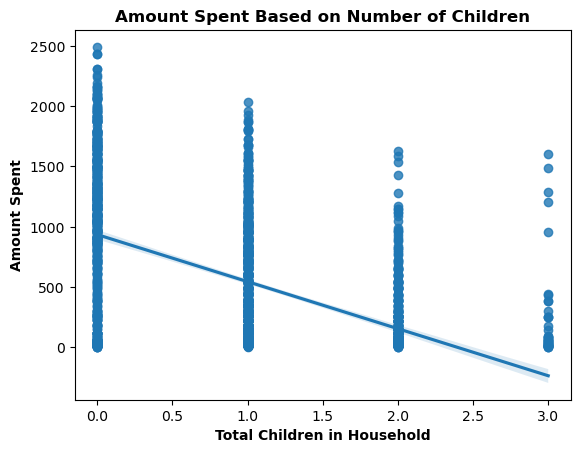

In [30]:
# visualize the spending of customers based on number of children in the household using a regression plot
sns.regplot(data = ufood_data, x = 'Total_Children', y = 'MntTotal')
plt.title('Amount Spent Based on Number of Children', fontweight='bold')
plt.xlabel('Total Children in Household', fontweight='bold')
plt.ylabel('Amount Spent', fontweight='bold')
plt.savefig(r'C:\Users\alex_\Desktop\Data Analysis Projects\Python\Projects\Python-Food-Marketing-Analysis\Images\plot7.png')
plt.show()

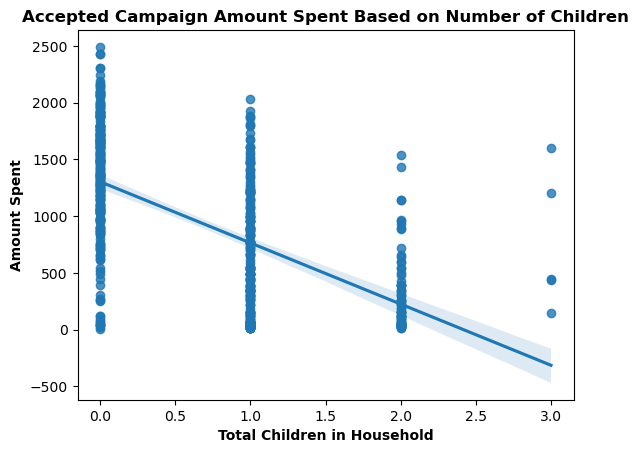

In [31]:
# visualize the spending of customers who accepted marketing campaigns based on number of children in the household
acct_campaign = ufood_data[ufood_data['Accepted_Campaigns'] != 0]
sns.regplot(data = acct_campaign, x = 'Total_Children', y = 'MntTotal')
plt.title('Accepted Campaign Amount Spent Based on Number of Children', fontweight='bold')
plt.xlabel('Total Children in Household', fontweight='bold')
plt.ylabel('Amount Spent', fontweight='bold')
plt.savefig(r'C:\Users\alex_\Desktop\Data Analysis Projects\Python\Projects\Python-Food-Marketing-Analysis\Images\plot8.png')
plt.show()

In [32]:
# Less kids means more likely to accept campaign and to spend more

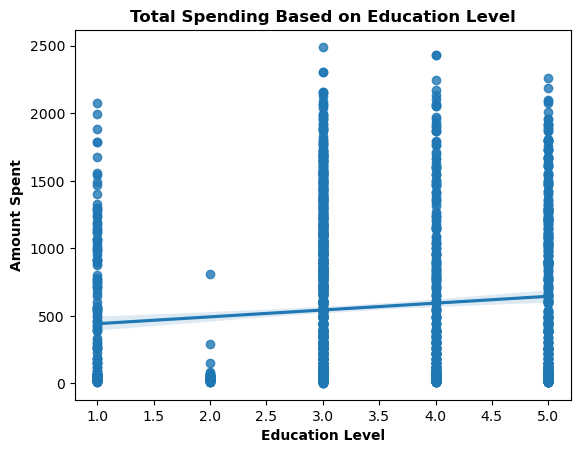

In [33]:
# visualize the spending rate based on number education level
sns.regplot(data = ufood_data, x = 'Education_Status', y = 'MntTotal')
plt.title('Total Spending Based on Education Level', fontweight='bold')
plt.xlabel('Education Level', fontweight='bold')
plt.ylabel('Amount Spent', fontweight='bold')
plt.savefig(r'C:\Users\alex_\Desktop\Data Analysis Projects\Python\Projects\Python-Food-Marketing-Analysis\Images\plot9.png')
plt.show()

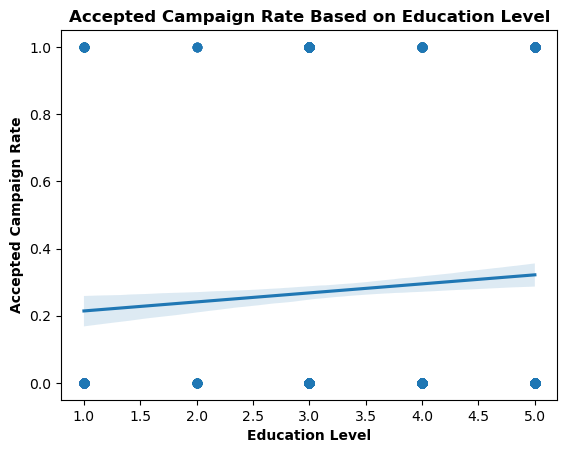

In [34]:
# visualize who accepted marketing campaigns based on number education level
sns.regplot(data = ufood_data, x = 'Education_Status', y = 'Accepted_Campaigns')
plt.title('Accepted Campaign Rate Based on Education Level', fontweight='bold')
plt.xlabel('Education Level', fontweight='bold')
plt.ylabel('Accepted Campaign Rate', fontweight='bold')
plt.savefig(r'C:\Users\alex_\Desktop\Data Analysis Projects\Python\Projects\Python-Food-Marketing-Analysis\Images\plot10.png')
plt.show()

In [35]:
# People with higher education are slightly more likely to accept a campaign and to spend more

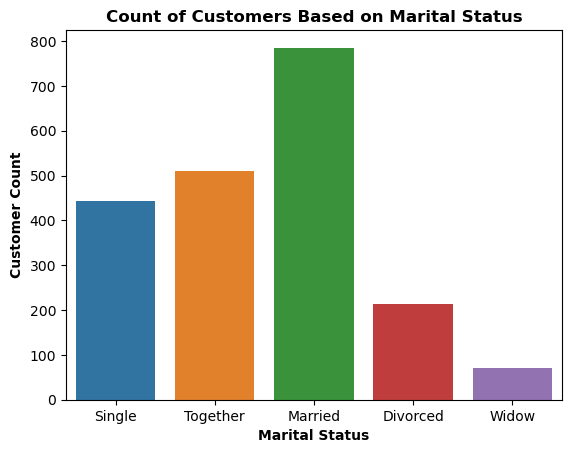

In [36]:
# visualize the customer count based on marital status
sns.countplot(data = ufood_data, x = 'Marital_Status_Str')
plt.title('Count of Customers Based on Marital Status', fontweight='bold')
plt.xlabel('Marital Status', fontweight='bold')
plt.ylabel('Customer Count', fontweight='bold')
plt.savefig(r'C:\Users\alex_\Desktop\Data Analysis Projects\Python\Projects\Python-Food-Marketing-Analysis\Images\plot11.png')
plt.show()

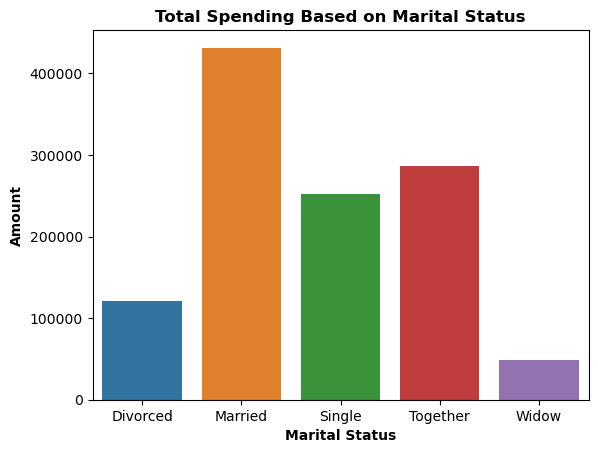

In [37]:
# visualize the spending totals based on marital status
rel_food = ufood_data.groupby('Marital_Status_Str')['MntTotal'].sum().reset_index()
sns.barplot(data = rel_food, x = 'Marital_Status_Str', y = 'MntTotal')
plt.title('Total Spending Based on Marital Status', fontweight='bold')
plt.xlabel('Marital Status', fontweight='bold')
plt.ylabel('Amount', fontweight='bold')
plt.savefig(r'C:\Users\alex_\Desktop\Data Analysis Projects\Python\Projects\Python-Food-Marketing-Analysis\Images\plot12.png')
plt.show()

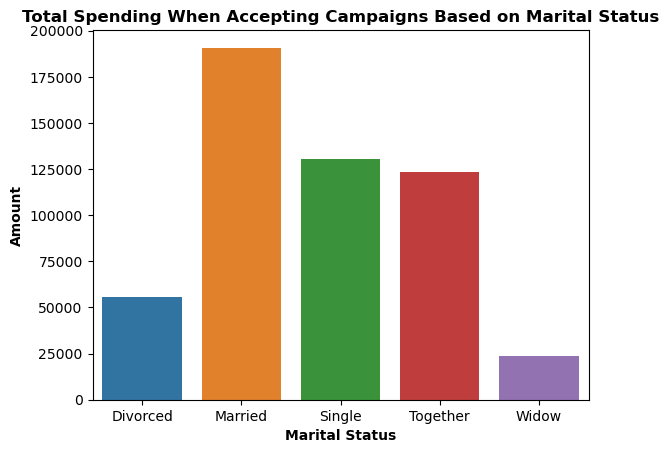

In [38]:
# visualize the accepted campaign spending based on marital status
acct_campaign = ufood_data[ufood_data['Accepted_Campaigns'] != 0]
rel_food = acct_campaign.groupby('Marital_Status_Str')['MntTotal'].sum().reset_index()
sns.barplot(data = rel_food, x = 'Marital_Status_Str', y = 'MntTotal')
plt.title('Total Spending When Accepting Campaigns Based on Marital Status', fontweight='bold')
plt.xlabel('Marital Status', fontweight='bold')
plt.ylabel('Amount', fontweight='bold')
plt.savefig(r'C:\Users\alex_\Desktop\Data Analysis Projects\Python\Projects\Python-Food-Marketing-Analysis\Images\plot13.png')
plt.show()

In [39]:
total = ufood_data['Marital_Status_Str'].value_counts()
accepted = ufood_data[ufood_data['Accepted_Campaigns'] == 1]['Marital_Status_Str'].value_counts()
pct_marital = accepted/total*100
pct_food = pct_marital.reset_index()
pct_food.columns = ['Marital_Status', 'Percentage']
pct_food

,Marital_Status,Percentage
0,Divorced,29.439252
1,Married,25.732484
2,Single,32.054176
3,Together,25.736739
4,Widow,35.714286


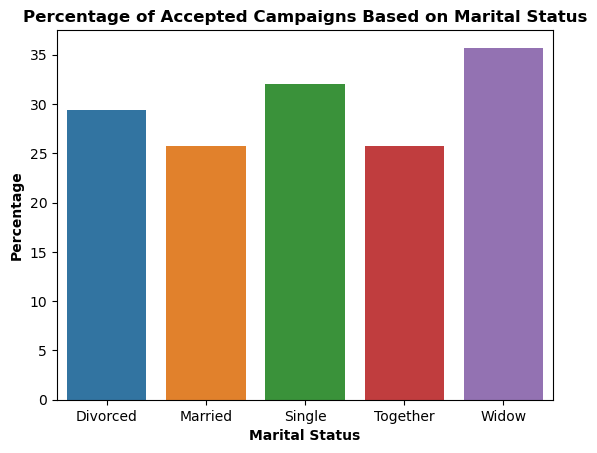

In [40]:
sns.barplot(data = pct_food, x = 'Marital_Status', y = 'Percentage')
plt.title('Percentage of Accepted Campaigns Based on Marital Status', fontweight='bold')
plt.xlabel('Marital Status', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.savefig(r'C:\Users\alex_\Desktop\Data Analysis Projects\Python\Projects\Python-Food-Marketing-Analysis\Images\plot14.png')
plt.show()

In [41]:
# Married, Single, and Together are spending more money than widowed or divorced

### OVERALL FINDINGS

1. Age - 30-69 were spending more money but less likely to accept campaigns, higher volume here though
2. Catalogue customers were more likely to accept campaigns, but in-person customers spent more. Recommend a split between all:
    40% catalogue, 30% in-store, 30% web
3. No kids or less kids appeared to spend more and accepted more campaigns. Focus on customers with less kids or no kids
4. Education level had a minor or neglible effect on campaign acceptance rate and spending.
5. Marital status had a minor or neglible effect on campaign acceptance rate and spending.


### Recommendations for increased revenue
- Focus on middle aged people, high earners, with no kids. Target on different platforms with split mentioned above

### Recommendations for untapped markets
-  Focus on under 30 and over 70 as they accepted campaigns at a higher rate